<a href="https://colab.research.google.com/github/Piaiai/My-pets/blob/master/naivi-bayes-spam-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving non_spam.txt to non_spam.txt
Saving words.csv to words.csv


In [ ]:
import pandas as pd
!pip install -U https://github.com/kmike/pymorphy2/archive/master.zip#egg=pymorphy2
!pip install -U pymorphy2-dicts-uk
import pymorphy2

punctuation = '!"#$%&\'()*+,-./:;<=>?@[\]^`{|}~«–»0123456789—„”“”'

class1 = list(pd.read_csv('words.csv')['Text'])
with open('non_spam.txt', 'r',  encoding='utf-8') as f:
    class2 = f.readlines()
class2 = ''.join(class2).splitlines()

              #предложение из текста 1
tests = ['Міські, селищні, сільські голови та голови об’єднаних територіальних громад звернулися до Президента, аби законопроєкт про децентралізацію суттєво доопрацювали, а сам процес став відкритим.', # предложение из текста 1
         'Завершується робота зі створення української центральної закупівельної організації, яка закуповуватиме ліки централізовано', # предложение из текста 1
         # предложение из текста 1
         'Надмірний формалізм під час вирішення питання про відкриття провадження у справі суперечить принципу верховенства права',
         'вивчення впливу окремих факторів середовища та їхніх комплексів на здоров\'я і життєдіяльність популяцій;', # предложение из текста 2
         'дослідження процесів збереження та відновлення здоров\'я і соціально-трудового потенціалу популяцій;', # предложение из текста 2
         'розробка шляхів підвищення рівня здоров\'я та соціально-трудового потенціалу населення;', # предложение из текста 2
         'У Єврокомісії підтвердили, що створений в Україні новий оператор газотранспортної системи готовий працювати', # предложение, содержащее слова из топ-30  класса 1
         'Їде в Україну працювати. Всього боїться',# предложение содержающие слова из топ-30  класса 1
         'Це й зрозуміло, бо природа — один з компонентів середовища існування людини, і від її стану залежить майбутнє всього людства.', # предложение содержающие слова из топ-30  класса 2
         'Життєдіяльність людини здійснюється в системі "людина – середовище існування".'] # предложение содержающие слова из топ-30  класса 2


     - 1.2MB 6.5MB/s
  Created wheel for pymorphy2: filename=pymorphy2-0.8-cp36-none-any.whl size=54984 sha256=b0440e95e6f7925d77ca2ba5fdc4c45002ece938d9b12b060ab9cc91167304bb
  Stored in directory: /tmp/pip-ephem-wheel-cache-p85o9f2h/wheels/f6/21/46/dff011bcd85c4d39485a665a721d8d685a4cdc29b37b0da7ce
Successfully built pymorphy2
  Found existing installation: pymorphy2 0.8
    Uninstalling pymorphy2-0.8:
      Successfully uninstalled pymorphy2-0.8


Requirement already up-to-date: pymorphy2-dicts-uk in /usr/local/lib/python3.6/dist-packages (2.4.1.1.1460299261)


In [ ]:
def pre_process(text: list) -> list:
    without_punctuation, result, temp_string = [], [], ''
    for st in text:
        for c in punctuation:
            st = st.replace(c, '')
        without_punctuation.append(st)
    morph_analyzer = pymorphy2.MorphAnalyzer(lang='uk')
    for st in without_punctuation:
        for w in st.split(' '):
            temp_string += morph_analyzer.parse(w)[0].normal_form + ' '
        result.append(temp_string)
        temp_string = ''
    return result

In [ ]:
def create_dict(text: list) -> dict:
    d = {}
    for sentence in text:
        for word in sentence.split():
            d[word] = d[word]+1 if word in d else 1
    return d

In [ ]:
class1, class2, tests_processed = pre_process(class1), pre_process(class2), pre_process(tests)

In [ ]:
def classify_by_naive_bayes(sentence: str, spam_likelihood=1) -> float:
    ham_likelihood = 1
    for word in sentence.split():
        if (word not in class1_dict) or (word not in class2_dict):
            continue
        spam_likelihood *= (class1_dict[word] / spam_words_count) * (spam_words_count / general_words_count) / (
                general_dict[word] / general_words_count)
        ham_likelihood *= (class2_dict[word] / ham_words_count) * (ham_words_count / general_words_count) / (
                general_dict[word] / general_words_count)
    return spam_likelihood / (spam_likelihood + 1 ** (1 - len(sentence.split())) * ham_likelihood)

In [ ]:
class1_dict, class2_dict = create_dict(class1), create_dict(class2) 
general_dict = create_dict(class1 + class2)

In [ ]:
spam_words_count, ham_words_count = len(''.join(class1).split()), len(''.join(class2).split())
general_words_count = spam_words_count + ham_words_count

In [ ]:
results = []
for sent in tests_processed:
    results.append(classify_by_naive_bayes(sent))

for prob, sent in zip(results, tests):
    print('Вероятность того, что сообщение "{0}" относится к классу 1 = {1}, \n классу 2 = {2} соответственно'.format(sent, prob, 1 - prob))

Вероятность того, что сообщение "Міські, селищні, сільські голови та голови об’єднаних територіальних громад звернулися до Президента, аби законопроєкт про децентралізацію суттєво доопрацювали, а сам процес став відкритим." относится к классу 1 = 0.7594936708860759, 
 классу 2 = 0.2405063291139241 соответственно
Вероятность того, что сообщение "Завершується робота зі створення української центральної закупівельної організації, яка закуповуватиме ліки централізовано" относится к классу 1 = 0.24999999999999994, 
 классу 2 = 0.75 соответственно
Вероятность того, что сообщение "Надмірний формалізм під час вирішення питання про відкриття провадження у справі суперечить принципу верховенства права" относится к классу 1 = 0.9189189189189189, 
 классу 2 = 0.08108108108108114 соответственно
Вероятность того, что сообщение "вивчення впливу окремих факторів середовища та їхніх комплексів на здоров'я і життєдіяльність популяцій;" относится к классу 1 = 0.3770491803278687, 
 классу 2 = 0.6229508196

In [ ]:
top_30_class1 = sorted(class1_dict.items(), key = lambda kv:(kv[1], kv[0]))[-30::]
top_30_class2 = sorted(class2_dict.items(), key = lambda kv:(kv[1], kv[0]))[-30::]

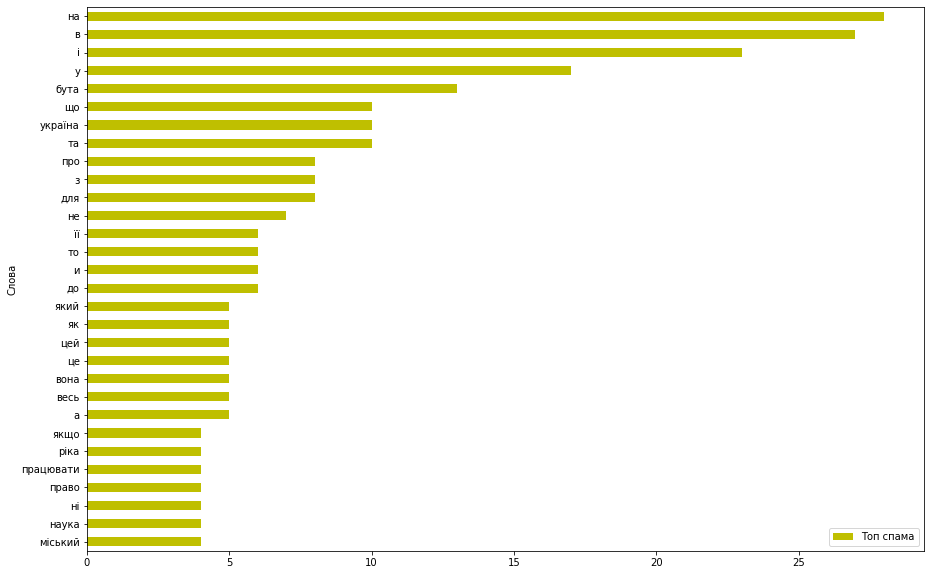

In [ ]:
import matplotlib.pyplot as plt
df = pd.DataFrame(top_30_class1, columns=['Слова', 'Топ спама'])
df.plot(kind='barh', x='Слова',figsize=(15, 10), color='y')
plt.show()

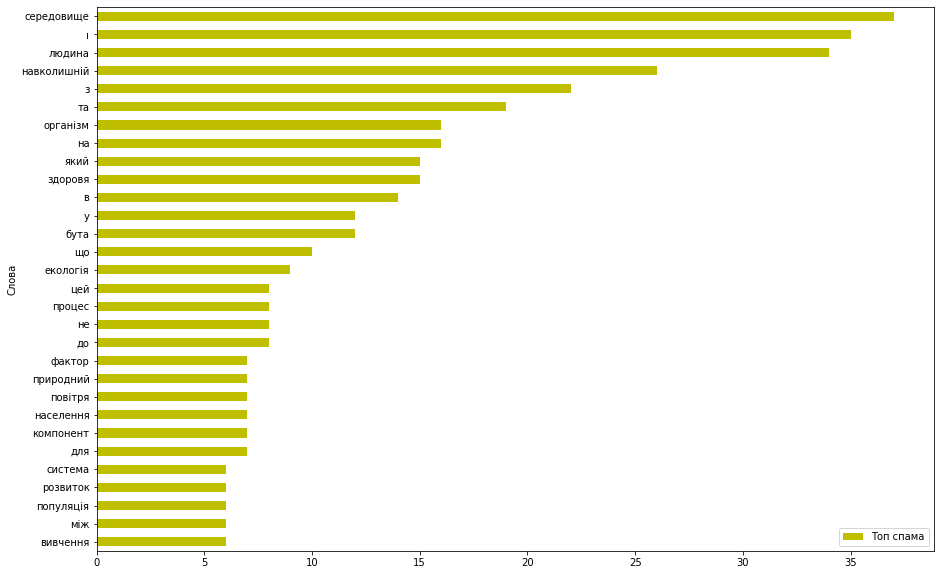

In [ ]:
import matplotlib.pyplot as plt
df = pd.DataFrame(top_30_class2, columns=['Слова', 'Топ спама'])
df.plot(kind='barh', x='Слова',figsize=(15, 10), color='y')
plt.show()